https://www.tensorflow.org/tutorials/keras/classification?hl=ja

# 初めてのニューラルネットワーク: 分類問題の基礎

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

print(f'TensorFlow version: {tf.__version__}')

TensorFlow version: 2.17.0


データの読み込みと観察

In [54]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# 正規化
train_images = train_images / 255.0
test_images = test_images / 255.0

train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

画像の表示

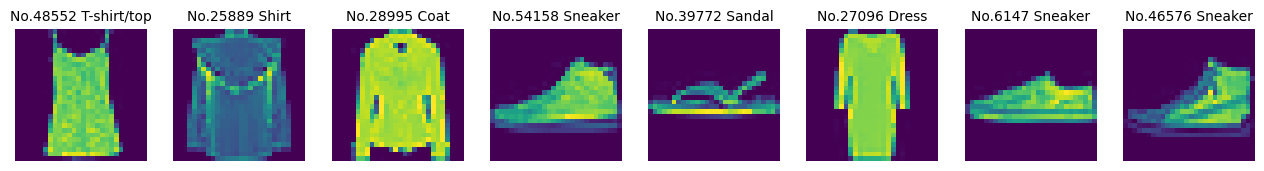

In [55]:
names = ["T-shirt/top", "Pants", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot",]
clothes = {i: c for i, c in enumerate(names)}

num_display = 8
fig, axs = plt.subplots(1, num_display, figsize=(num_display*2, 3))
for i, ax in enumerate(axs):
    num = np.random.randint(train_labels.shape[0])
    ax.imshow(train_images[num])
    ax.set_title(f'No.{num} {clothes[train_labels[num]]}', fontsize=10)
    ax.axis('off')

In [56]:
tf.random.set_seed(32)

# model = tf.keras.Sequential()

# model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
# model.add(tf.keras.layers.Dense(128, activation="relu"))
# model.add(tf.keras.layers.Dense(10, activation="softmax"))

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
    ])

BATCH_SIZE = 32
EPOCHS = 10
CSV_FILE_PATH = 'tensorflow_test_04.csv'
VERBOSE = 1
OPTIMIZERS = "adam"

# model.compile(optimizer=OPTIMIZERS, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.compile(optimizer=OPTIMIZERS, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

callbacks = [tf.keras.callbacks.CSVLogger(CSV_FILE_PATH)]
history = model.fit(
    train_images,
    train_labels,
    # batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=VERBOSE,
    validation_data=(test_images, test_labels),
    callbacks=callbacks,
)

c:\Users\JY810251\python\blow_prediction\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10


c:\Users\JY810251\python\blow_prediction\.venv\Lib\site-packages\keras\src\backend\tensorflow\nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7825 - loss: 0.6283 - val_accuracy: 0.8437 - val_loss: 0.4288
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8604 - loss: 0.3934 - val_accuracy: 0.8558 - val_loss: 0.3961
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8750 - loss: 0.3489 - val_accuracy: 0.8597 - val_loss: 0.3830
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8842 - loss: 0.3212 - val_accuracy: 0.8620 - val_loss: 0.3779
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8897 - loss: 0.3022 - val_accuracy: 0.8654 - val_loss: 0.3714
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8960 - loss: 0.2859 - val_accuracy: 0.8674 - val_loss: 0.3721
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8997 - loss: 0.2726 - val_accuracy: 0.8707 - val_loss: 0.3628
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9038 - loss: 0.2601 - val_acc

In [58]:
df_history = pd.DataFrame(history.history)
df_history.tail(1)

,accuracy,loss,val_accuracy,val_loss
9,0.91302,0.23457,0.87500,0.36215


In [59]:
pd.options.display.float_format = '{:.05f}'.format
predictions = model.predict(test_images, verbose=0)
df_pred = pd.DataFrame(predictions)
df_pred['pred'] = df_pred.iloc[:, 0:10].idxmax(axis=1)
df_pred['test_labels'] = test_labels
df_pred.head(3)

,0,1,2,3,4,5,6,7,8,9,pred,test_labels
0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00101,0.00000,0.01675,0.00000,0.98225,9,9
1,0.00001,0.00000,0.99318,0.00000,0.00200,0.00000,0.00482,0.00000,0.00000,0.00000,2,2
2,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1,1


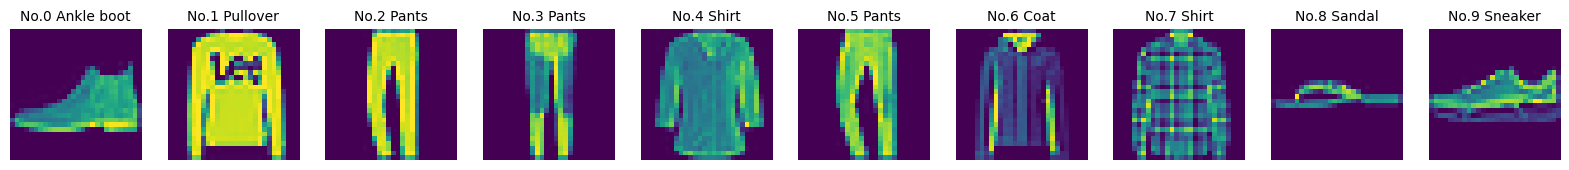

In [73]:
num_display = 10
fig, axs = plt.subplots(1, num_display, figsize=(num_display*2, 3))
for i, ax in enumerate(axs):
    num = np.random.randint(train_labels.shape[0])
    num = i
    ax.imshow(test_images[num])
    ax.set_title(f'No.{num} {clothes[test_labels[num]]}', fontsize=10)
    ax.axis('off')

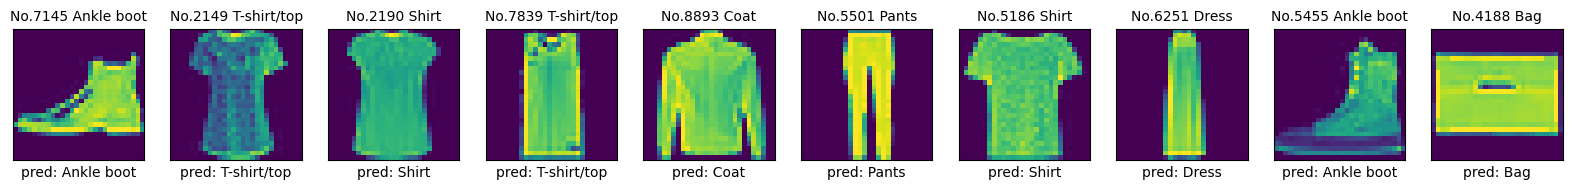

In [92]:
num_display = 10
fig, axs = plt.subplots(1, num_display, figsize=(num_display*2, 3))
for i, ax in enumerate(axs):
    num = np.random.randint(test_labels.shape[0])
    i = num
    pred = df_pred.iloc[i, 10]
    test_label = df_pred.iloc[i, 11]
    ax.imshow(test_images[i])
    ax.set_title(f'No.{i} {clothes[test_labels[i]]}', fontsize=10)
    ax.set_xlabel(f'pred: {clothes[pred]}', fontsize=10)
    ax.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False, bottom=False, left=False, right=False, top=False)
plt.show()

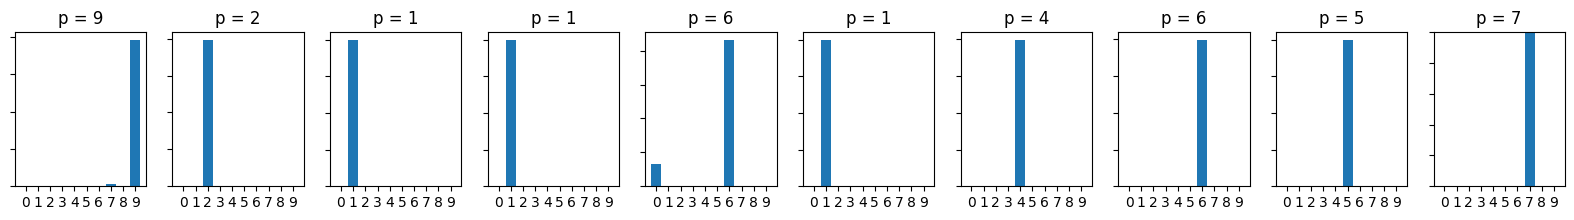

[9, 2, 1, 1, 6, 1, 4, 6, 5, 7]


In [107]:
num_display = 10
fig, axs = plt.subplots(1, num_display, figsize=(num_display*2, 2))
plt.ylim([0, 1])
for i, ax in enumerate(axs):
    ax.bar(range(10), df_pred.iloc[i, 0:10])
    ax.set_title(f'p = {df_pred.iloc[i, 10]}')
    ax.set_xticks(range(10))
    ax.tick_params(labelbottom=True, labelleft=False, labelright=False, labeltop=False)
plt.show()
print(df_pred['pred'][:10].to_list())

In [109]:
df_pred[df_pred['pred'] != df_pred['test_labels']]

,0,1,2,3,4,5,6,7,8,9,pred,test_labels
17,0.00018,0.00000,0.84208,0.00000,0.14197,0.00000,0.01577,0.00000,0.00000,0.00000,2,4
23,0.00001,0.00000,0.00000,0.00000,0.00000,0.97333,0.00000,0.00262,0.00000,0.02404,5,9
25,0.00101,0.00002,0.48290,0.00003,0.42362,0.00000,0.09241,0.00000,0.00001,0.00000,2,4
29,0.02834,0.00009,0.03214,0.32002,0.21596,0.00000,0.39896,0.00000,0.00424,0.00024,6,3
40,0.79715,0.00000,0.00000,0.00001,0.00000,0.00000,0.20283,0.00000,0.00000,0.00000,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...
9955,0.53579,0.00000,0.00037,0.06982,0.00000,0.00000,0.39401,0.00000,0.00000,0.00000,0,6
9961,0.00242,0.00006,0.92701,0.00000,0.01442,0.00001,0.05559,0.00000,0.00048,0.00000,2,6
9972,0.28348,0.00000,0.02096,0.00001,0.00002,0.00000,0.69552,0.00000,0.00000,0.00000,6,2
9977,0.77260,0.00001,0.00015,0.00001,0.00000,0.00000,0.22723,0.00000,0.00000,0.00000,0,6


トレーニングされたモデルを使用する

In [125]:
img = test_images[0]
print(img.shape)
img = np.expand_dims(img, 0)
print(img.shape)
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions_single = probability_model.predict(img)
print(np.argmax(predictions_single[0]))

(28, 28)
(1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
9
